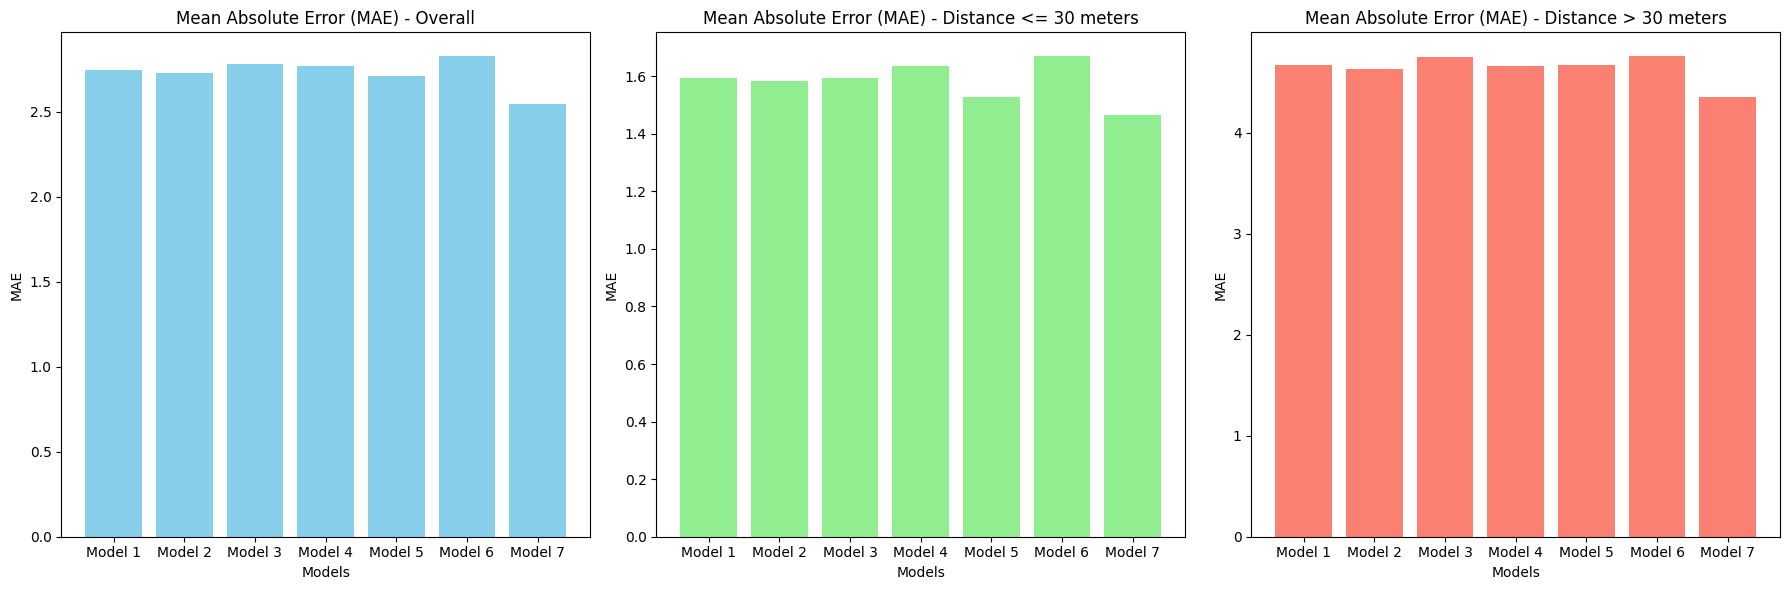

Best overall model: Model 7
Best model for distance <= 30 meters: Model 7
Best model for distance > 30 meters: Model 7


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths for each predictions file
prediction_files = [f'distance-estimator/data/predictions{i}.csv' for i in range(1, 8)]
model_names = [f'Model {i}' for i in range(1, 8)]

# Initialize lists to store accuracy results
mae_below_30 = []
mae_above_30 = []
mae_overall = []

for file in prediction_files:
    # Load the predictions data
    df = pd.read_csv(file)

    # Calculate Mean Absolute Error (MAE) for each distance range
    df['error'] = abs(df['zloc'] - df['zloc_pred'])

    # Overall MAE
    mae_overall.append(df['error'].mean())

    # MAE for distances below and above 30 meters
    mae_below_30.append(df[df['zloc'] <= 30]['error'].mean())
    mae_above_30.append(df[df['zloc'] > 30]['error'].mean())

# Plotting the results in a 1-row, 3-column grid
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Overall MAE for each model
ax[0].bar(model_names, mae_overall, color='skyblue')
ax[0].set_title('Mean Absolute Error (MAE) - Overall')
ax[0].set_ylabel('MAE')
ax[0].set_xlabel('Models')

# MAE for distances below 30 meters
ax[1].bar(model_names, mae_below_30, color='lightgreen')
ax[1].set_title('Mean Absolute Error (MAE) - Distance <= 30 meters')
ax[1].set_ylabel('MAE')
ax[1].set_xlabel('Models')

# MAE for distances above 30 meters
ax[2].bar(model_names, mae_above_30, color='salmon')
ax[2].set_title('Mean Absolute Error (MAE) - Distance > 30 meters')
ax[2].set_ylabel('MAE')
ax[2].set_xlabel('Models')

plt.tight_layout()
plt.show()

# Identify the best models
best_overall = model_names[mae_overall.index(min(mae_overall))]
best_below_30 = model_names[mae_below_30.index(min(mae_below_30))]
best_above_30 = model_names[mae_above_30.index(min(mae_above_30))]

print(f"Best overall model: {best_overall}")
print(f"Best model for distance <= 30 meters: {best_below_30}")
print(f"Best model for distance > 30 meters: {best_above_30}")
